### Import the relevant libraries

In [89]:
import pandas as pd
import numpy as np

### Load the data

In [90]:
data_preprocessed = pd.read_csv('data/Absenteeism-preprocessed.csv')
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


We will use a logistic regression which will take the reason for absence month of the year day of the week transportation expense distance to work age daily work load average education children and pets of a given employee and we'll predict their absenteeism we expect that half of those predictors won't have merit.
To me it seems that the reason for absence will be the most indicative maybe workload will have something to do with it as well since the busier a person is the less he or she will want to skip work. Finally children and pets together with distance from work should also have something to do with absenteeism. If your child or pet is sick at home you'll have to go home take them to the doctor and get them back which will be much more time consuming than a simple visit to the doctor OK. We have a good idea what to expect.

### Create the Target

We've got a bit more pre processing to do but it is of a different kind. We said we will use a logistic regression to predict absenteeism logistic regression is a type of classification so we will be basically classifying people into classes. What are these classes then.That's what we must settle first and then pre process our data to reflect this decision the approach we will use here is to create two classes one representing people who have been excessively absent and another which represents people that haven't for this exercise. We will use a methodology which is a tiny bit naive but quite numerically stable.We will take the median value of the absenteeism time into our cell everything below the median would be considered normal. Everything above the median would be excessive OK let's find that median there is the panda's method called median which can help us with this task.

In [91]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

Good **three hours** is our cutoff line. If an observation has been absent for less than three hours we will assign it the value of zero. Otherwise the value of 1 in supervised machine learning we call these zeros and ones targets. These are the values we are aiming for. Our task will be to predict whether we will obtain a zero or a one. So let's create a new variable called targets which will measure if a person has been absent for more than three hours. The `np.where` function in this method is constructed with three arguments a condition, value of true and value if false. Our condition is that the series absenteeism time and hours from data pre processed is bigger than 3 if it is true. We want the function to return 1 otherwise zero.

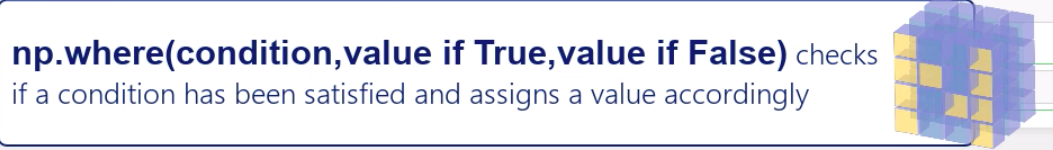

In [92]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > data_preprocessed['Absenteeism Time in Hours'].median(),1,0)

In [93]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

I told you that using the median as a cutoff line is numerically stable and rigid. That's because by using the median we have implicitly balance the dataset roughly half of the targets are zeros while the other half ones as you may remember this will prevent our model from learning to output one of the two classes exclusively thinking it did very well in order to prove that. Let's divide the number of targets that are ones by the total number of targets the number of targets that are ones can be found by summing up all values of targets while the total number of targets is simply the shape on axis 0.

In [94]:
targets.sum()/targets.shape[0]

0.45571428571428574

The result is around zero point four six. So around forty six percent of the targets are ones thus around 54 percent of the targets are zeros.So our result will do for this exercise let's proceed noting that our two groups have been distributed roughly equally finally let's drop the absenteeism time and hours from the data frame since we won't be needing it.

In [95]:
#let's add the targets to the data frame data pre processed.
data_preprocessed['Excessive Absenteeism'] = targets
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [96]:
#Let's drop the 'Absenteeism Time in Hours' column and create new data and continiue with it 

data_with_target = data_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)
data_with_target.head()


,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


### Select the inputs for our regression.
We will use the panda's method iloc, since it is extremely useful and common. There are two arguments.
The first one refers to the row indices and the second one two column indices.
```python
#select (slices)data by position where given rows and columns wanted
DataFrame.iloc[row indices, column incides]
```
I would actually prefer to select all rows so I can simply leave colons in the brackets as the first argument to select the inputs for our regression. We must select all rows and all columns except for `excessive absenteeism`. 
```python
data_with_target.iloc[:,:14]
#OR 
data_with_target.iloc[:,:-1]
```

Both method is fine, Let's use last one and assign the results `unscaled_inputs` variable

In [97]:
data_with_target.shape

(700, 15)

In [98]:
unscaled_inputs = data_with_target.iloc[:,:-1]
unscaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1


### Standardize the data

It is time to standardize our data. Let's import the relevant module from S.K. learn. First we must declare a standard scalar object.  Note that we have created an empty standard scalar object. There is no information in it for those of you that haven't seen scaling with standard scalar.
**Standard scalar is subtract the mean and divide by the standard deviation from each point variable**
The next step is to fit our input data. We write absenteeism scalar.fit unskilled inputs this line will calculate the mean and standard deviation of each feature from unskilled inputs. This information will be stored in the absenteeism scale object so it won't be an empty object anymore. It will contain information about the mean and standard deviation. This is extremely important whenever you get new data you will know that the standardization information is contained in the absenteeism scalar. Thus you'll be able to standardize the new data in the same way. Remember this as it will be very useful later on. OK so we have the information but the inputs are still on scaled. We have just prepare the scaling mechanism in order to apply it. We must use another method called transform so let's scale inputs be equal to absenteeism scalar dot transform unskilled inputs this operation transforms the unskilled inputs using the information contained in absenteeism scalar in simple words we subtract the mean and divide by the standard deviation whenever we get new data we will just apply absenteeism scalar dot transform new data to reach the same transformation as we just did. This is the most common and useful way to transform New data.

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy, with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order =X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_sclaed = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_sclaed, X_scaled], axis=1)[init_col_order]


In [100]:
#we must choose the columns to be scaled to see what columns we've got.
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pet'], dtype=object)

In [101]:
columns_to_sclae = ['Month Value','Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pet']

In [102]:
#Let's created an empty standard scalar object
#absenteeism_scaler = StandardScaler()

absenteeism_scaler =CustomScaler(columns_to_sclae)


In [103]:
#fit our input data, this will calculate the mean and standard deviation of each feature from unskilled inputs
absenteeism_scaler.fit(unscaled_inputs)

CustomScaler(columns=['Month Value', 'Day of the Week', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pet'],
       copy=None, with_mean=None, with_std=None)

We also standardize the dummies.This is bad practice because when we standardize we lose the whole interpret ability of a dummy if we had left them as zeros and ones we could have said for a unit change it is seven point two times more likely that a person will be excessively absent a unit change in the dummy variable universe means a change from disregarding this dummy to taking only this dummy into account so if the reason is reason one we would have said it is around set points seven times more likely that a person will be absent compared to no reason given however we standardize the reasons and now a unit change is completely on interpretable the predictive power of the model is still valid and it is a good classifier but we don't know how the different reasons compare. This is a problem since those are the most important features. This brings us to a correction of our code. Good thing we had all those checkpoints. Maybe they'll help us do that effortlessly. I'll go back to the part where we standardize the data and put all the code in comments since we won't be needing it now. I'll copy paste some code that I prepared prior to this lecture. The idea is that this is a custom scalar based on the standard scalar from SDK learn. However when we declare the scalar object there's an extra argument columns to scale so our custom scalar will not standardize all inputs but only the ones we choose. In this way we will be able to preserve the dummies untouched.

In [104]:
#Until we transform the data inputs still on non-scaled. For using this method we always transform new data
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [105]:
# you can see all our dummies have remained untouched and that was the wholo point
scaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet
0,0,0,0,1,0.030796,-0.800950,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.030796,-0.800950,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.030796,-0.232900,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.030796,0.335149,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.030796,0.335149,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487


In [106]:
scaled_inputs.shape

(700, 14)

### Split to the data into train & test 
We will split the dataset into train and test so we can assess the model's accuracy on data.Sklearn has a pretty neat method of splitting the data into train and test in order to use it. Split the train test split method is very powerful and has many arguments.The method to split the data the output we obtain consists of for arrays a
training dataset with inputs then a test data set with inputs a trained data set with targets and a test data set with targets. We will call them X_train X_test y_train and y_test.
 
We can see the shapes of these variables. This will be very indicative of what the train test split has actually achieved as you can see that 75% of the observations will help us with training and 25% will serve for testing as default.We can specify the train_size(or test_size) argument  equal to a certain value between 0 and 1 .

The train test split method has a shuffle parameter shuffle is a boolean so it can be either true or false by default. Shuffling is set to true. It may be a small issue for us when we rerun our code. We get a different shuffle and this means a different split. This causes the final model to defer every time due to the shuffling.
So the shuffle can make things difficult for us. There is a simple solution though all S.K. learn functions that include some randomness like the random shuffle here contain a random state parameter random state takes integer values. What we can do is set the random state to a number say 20. This will make the shuffle pseudo random.
It will always shuffle observations in the same random way.

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size =0.2, random_state=20)

In [109]:
print(X_train.shape, y_train.shape)

(560, 14) (560,)


In [110]:
print(X_test.shape, y_test.shape)

(140, 14) (140,)


## LOGISTIC REGRESSION FOR SKLEARN

And now it's finally time for the modeling part as usual.Let's import the relevant modules since we are building a logistic regression.

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics

In [112]:
#we must declare a new variable which will be a logistic regression object
reg = LogisticRegression()

#We must fit the regression.
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

`As an output we get all the parameters of the logistic regression object we specified above obviously they are all the default ones since we didn't specify anything. Each of those parameters has a special meaning which can improve our model one way or the other.`

For now let's focus on the results of this regression. It is easy to evaluate the model accuracy.

```python
sklearn.linear_model.LogisticRegression.score(inputs, targets) # HERE (X_train, y_train)
```

In [113]:
reg.score(X_train, y_train)

0.7660714285714286

`The result is around zero point eighty we conclude that our model has an accuracy of zero point eight or 80 percent. In other words based on the data we used our model learned to classify 80 percent of the observations`

#### Manually check the accuracy
Accuracy means that 80 percent of the model outputs match the targets so if we want to find the accuracy of a model manually we should find the outputs and compare them with the targets let's do that in order to find the model outputs. We will use a simple as K learned method. It is called predict.This method will find the predicted outputs of the regression the model itself is contained in the variable reg and we are choosing to predict the outputs associated with the training inputs and contained in X train. 

In [114]:
model_outputs = reg.predict(X_train)
model_outputs

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

We can see an array with zeros and ones. These are the predictions of our model. If we look at the difrences between using (model_outputs == targets) we can see that If there is a match the result is true. Otherwise it is false. Now we can clearly see which elements have been guessed correctly and which haven't but how many are there. if we  sum this array using np.sum. The result will be the total number of true entries and if we divide the number of matches by the total number of elements. We will get the accuracy.
let's divide the number of true entries by that

In [115]:
np.sum(model_outputs == y_train)/ model_outputs.shape[0]

0.7660714285714286

`What we get the exact same result as using the SKlearn methods score. However this time we have a much better idea of what that result means.`

### Intercept & Coefficient

Regression analysis, no matter if linear or nonlinear it's about determining certain coefficients or weights which we apply to the inputs to obtain a final result. So to use this logistic regression model outside of Python we must get our hands on the coefficients and the intercept.
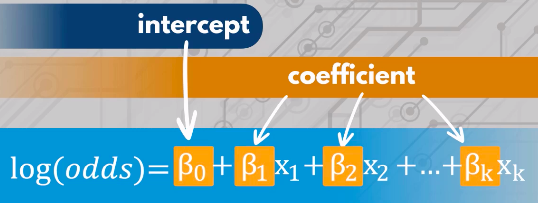



In [116]:
reg.intercept_

array([-1.43101781])

In [117]:
reg.coef_

array([[ 2.61893423,  0.83461948,  2.95258195,  0.64428488,  0.01123706,
        -0.0748093 ,  0.62180009, -0.02934223, -0.17585164, -0.02583315,
         0.27705024, -0.29385863,  0.3549178 , -0.27486307]])

We want to know what variable those coefficients refer to we can get the coefficients from the names of our inputs column values.

In [118]:
features_names = unscaled_inputs.columns.values
features_names

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pet'], dtype=object)

I want to create a data frame that will contain the intercept the feature names and the corresponding coefficients we can call this data frame summary table

In [119]:
Summary_of_Table = pd.DataFrame(columns=['Feature Name'], data=features_names)
Summary_of_Table['Coefficient'] = np.transpose(reg.coef_)

In [120]:
Summary_of_Table

,Feature Name,Coefficient
0,Reason_1,2.618934
1,Reason_2,0.834619
2,Reason_3,2.952582
3,Reason_4,0.644285
4,Month Value,0.011237
5,Day of the Week,-0.074809
6,Transportation Expense,0.621800
7,Distance to Work,-0.029342
8,Age,-0.175852
9,Daily Work Load Average,-0.025833


To add the intercept to the beginning of table we will follow the method showed below.

In [121]:
Summary_of_Table.index = Summary_of_Table.index +1
Summary_of_Table.loc[0] = ['intercept', reg.intercept_[0]]
Summary_of_Table =Summary_of_Table.sort_index()

In [122]:
Summary_of_Table

,Feature Name,Coefficient
0,intercept,-1.431018
1,Reason_1,2.618934
2,Reason_2,0.834619
3,Reason_3,2.952582
4,Reason_4,0.644285
5,Month Value,0.011237
6,Day of the Week,-0.074809
7,Transportation Expense,0.621800
8,Distance to Work,-0.029342
9,Age,-0.175852


**interprete the coefficients** Coefficients are also called weights while the intercept bias. These notions are useful because the weights show how we weigh a certain input. The closer they are to zero the smaller the weight and alternatively the further away from zero no matter if positive or negative the bigger the weight of this feature. Note that this is something which is true for our model but it's not universally true. It holds only four models where all variables are of the same scale such as the one we just built there are coefficient values and standardised coefficient values. These standardized coefficients are basically the coefficient values of a regression where all variables have been standardized other packages and software include the standardized coefficients because they allow for a simple and easy to understand comparison between the variables since. In such cases the features are standardized they all have a variance of one or the same scale. And whenever the scale is standard or the same that is we can simply say whichever way it is bigger its corresponding feature is more important for machine learning purposes and prediction in general we usually standardize the variables like we did now.  Another notion we must emphasize is that whenever we are dealing with a `logistic regression`  the coefficients we are predicting are the so-called `log odds`. This is a consequence of the choice of model logistic regression by default are nothing but a linear function. Predicting log odds these log odds are later transformed into zeros and ones let's make this clearer. Here's the logistic regression equation...

```python
log(odds) = intercept + b1x1 +b2x2+ ..... b13x13 + b14x14

-0.21 + 2.07*Reason_1 + 0.33*Reason_2 + 1.31*Reason_4 + 0.02*Month Value + (-0.09)*Day of the Week + 0.72*Transportation Expense + (-0.06)*Distance to Work + (-0.21)*Age +  (-0.03)*Daily Work Load Average+ 
0.33*Body Mass Index + (-0.16)*Education + 0.38*Children + (-0.32)*Pet
```

So to make them more interpretable let's find the exponential of these coefficients. I'll create a new series in our data frame called Odds Ratio 

In [123]:
Summary_of_Table['Odds Ratio'] = np.exp(Summary_of_Table.Coefficient)

In [124]:
Summary_of_Table

,Feature Name,Coefficient,Odds Ratio
0,intercept,-1.431018,0.239065
1,Reason_1,2.618934,13.721092
2,Reason_2,0.834619,2.303937
3,Reason_3,2.952582,19.155348
4,Reason_4,0.644285,1.904625
5,Month Value,0.011237,1.011300
6,Day of the Week,-0.074809,0.927920
7,Transportation Expense,0.621800,1.862277
8,Distance to Work,-0.029342,0.971084
9,Age,-0.175852,0.838742


I'll sort the data frame using the sort values method. Sort values requires us to choose the appropriate
column by which we want to sort the whole data frame logically for us.

In [125]:
Summary_of_Table.sort_values('Odds Ratio', ascending=False)

,Feature Name,Coefficient,Odds Ratio
3,Reason_3,2.952582,19.155348
1,Reason_1,2.618934,13.721092
2,Reason_2,0.834619,2.303937
4,Reason_4,0.644285,1.904625
7,Transportation Expense,0.621800,1.862277
13,Children,0.354918,1.426063
11,Body Mass Index,0.277050,1.319233
5,Month Value,0.011237,1.011300
10,Daily Work Load Average,-0.025833,0.974498
8,Distance to Work,-0.029342,0.971084


So how can we interpret them. If a coefficient is around zero or its odds ratio is close to one. This means that the corresponding feature is not particularly important the reasoning in terms of weights is that a weight of 0 implies that no matter the feature value we will multiply it by 0 and the whole result will be 0 the meaning in terms of odds ratios as the following for one unit change in the standardised feature. The odds increase by a multiple equal to the odds ratio so if the odds ratio was 1 then the odds don't change at all. We have weights like that. The daily work load average is almost 1. So this feature is almost useless for our model and with or without it the result would likely be the same. We have other variables that can fall into this category. Day of the week and distance to work. given all features these seem to be the ones that make no difference. We will keep that features for now but consider dropping them later on.

### Interpreting the important features

We will focus on the most important features I'll just remind you that the further away from zero a coefficient is the bigger its importance. So by looking at the coefficients table we will notice that the most strongly pronounced features seem to be the four reasons for absence. The transportation expense and whether a person has children pets and education. Note that pet and education are at the bottom of the table but their weights are still far away from zero. They are indeed important we can carry on in this way. Finishing with the daily work load average distance to work and day of the week would seem to have the smallest impact. The weight is almost zero. So regardless of the particular values they will barely affect our model. What about the reasons we said that the base model includes no reason. But what is the impact of the various reasons I'll quickly recap what the five reason variables stand for reason zero or no reason which is the baseline model. Reason 1 which comprises of various diseases. Reason to relating to pregnancy and giving birth. Reason 3 regarding poisoning and peculiar reasons not categorized elsewhere and reason for which relates to light diseases in the light of this clarification. We can easily understand our coefficients the most crucial reason for excess of absence is poisoning not much of a surprise there.  The weight means the odds of someone being excessively absent after being poisoned are 20 times higher than when no reason was reported OK. Clear another very important reason seems to be no one or various diseases. I'd call this the normal absenteeism case you got sick you skipped work no drama. A person who was reported this is 14 times more likely to be excessively absent than a person who didn't specify a reason then we have pregnancy and giving birth.  All right after that we've got transportation expense. This is the most important non dummy feature in the model. But here's the problem. It is one of our standardized variables.We don't have direct interpret ability of it. Its odds ratio implies that for one standardized unit or for one standard deviation increase in transportation expense it is close to twice as likely to be excessively absent. This is the main drawback of standardization. Standardized models almost always yield higher accuracy because the optimization algorithms work better in this way. `Machine learning engineers` prefer models with higher accuracy so they normally go for standardization `economy patricians and statisticians` however prefer less accurate but more interpretable models because they care about the underlying reasons behind different phenomena.
`Data scientists` may be in either position sometimes they need higher accuracy.Other times they must find the main drivers of a problem so it makes sense to create two different models one with standardized features and one without them and then draw insights from both.


### Testing the Model
It is time to use the test data. This will also be the end of the machine learning part.That's because testing is done only once and at the very end of the machine learning process.

In [126]:
reg.score(X_test, y_test)

0.75

Instead of zero and one we can get the probability of an output being zero or 1.There is an SDK learn method called `predict probe`.

In [136]:
#instead of 0 and 1 we can get the Probability of an output beging 0 or 1
predicted_proba =reg.predict_proba(X_test)
predicted_proba.shape


(140, 2)

The first column shows the probability our model assigned to the observation being 0 and the second. The probability of the model assigned to the observation being 1.

In [137]:
#This will give us the probabilities of excessive absenteeism and this result his much cooler than simply 1 or 0
#probability of beging 1 
predicted_proba[:,1]

array([0.24317661, 0.37463683, 0.54177647, 0.22900075, 0.92457372,
       0.71721095, 0.70198458, 0.88951845, 0.24828394, 0.24476587,
       0.50124778, 0.8166621 , 0.93109413, 0.31720501, 0.72480078,
       0.49830375, 0.48334522, 0.44729395, 0.61858827, 0.94389387,
       0.26739396, 0.23658997, 0.56099766, 0.54331094, 0.78128297,
       0.2472754 , 0.50532304, 0.12529269, 0.76947642, 0.24435098,
       0.40027784, 0.72282213, 0.68309208, 0.50183789, 0.23658997,
       0.57490362, 0.26244825, 0.76322809, 0.45070188, 0.58941464,
       0.2545466 , 0.45376473, 0.2442691 , 0.43454262, 0.80228922,
       0.64667768, 0.74190084, 0.25131584, 0.26873282, 0.21760326,
       0.5187978 , 0.33929554, 0.69210482, 0.26325808, 0.84108495,
       0.41846317, 0.91617148, 0.29643862, 0.35033133, 0.34573211,
       0.73164572, 0.66843639, 0.29005712, 0.79176288, 0.24924481,
       0.24578167, 0.08973456, 0.25026941, 0.77127351, 0.32080676,
       0.25384078, 0.34924202, 0.89412946, 0.44546805, 0.61064